# Short-Step Dual Barrier Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def newton(A, b, c, mu, p, K):
    m, n = A.shape
    e = np.ones(n)
    A_t = A.T
    for _ in range(K):
        v = A_t.dot(p)
        D = np.diag(1/(c - v))
        D2 = np.power(D, 2) # = D.dot(D) since it is a diagonal matrix
        delta_p = np.linalg.inv(A.dot(D2).dot(A_t)) # m-by-m
        delta_p = delta_p.dot(b/mu - A.dot(D).dot(e)) # m-dim
        p = p + delta_p
    return p

In [3]:
def dual_barrier(A, b, c, p0, mu0, alpha, tol, K):
    p = newton(A, b, c, mu0, p0, K)
    mu = mu0
    m, n = A.shape
    pvecs = [p]
    objvals = [b.T.dot(p)]
    while mu*n >= tol:
        mu = alpha * mu
        p = newton(A, b, c, mu, p, K)
        pvecs.append(p)
        objvals.append(b.T.dot(p))

    return p, objvals, pvecs

##Problem Setting

In [4]:
# problem setting
e = 0.2
A_t = np.array([
    [-1, 0, 0],
    [1, 0, 0],
    [e, -1, 0],
    [e, 1, 0],
    [0, e, -1],
    [0, e, 1]
])
A = A_t.T
b = np.array([0, 0, 1])
c = np.array([-e, 1, 0, 1, 0, 1])

In [5]:
A_t.shape


(6, 3)

In [6]:
# correctness check
from scipy.optimize import linprog
# Note that by default lb = 0 and ub = None unless specified with bounds.
result_sp = linprog(c=c, A_eq=A, b_eq=b)
print('Reference SciPy Solution for Primal x: {}'.format(result_sp.x))

Reference SciPy Solution for Primal x: [0.04 0.   0.2  0.   0.   1.  ]


In [7]:
print(f'(a) Optimal value of Primal for reference: {result_sp.fun}')

(a) Optimal value of Primal for reference: 0.992


###Result analysis: Note that if primal or dual is finite, then the optimal values for both are the same by Strong Duality.

###We are now doing "Dual", so if we are right, then the optimal value of Dual should be the same with that from SciPy solution for Primal.

###Initial try to achieve good convergence

In [8]:
# (b) Initial try to achieve good convergence
p0 = np.array([0.5, 0.5, 0.5])
tol = 1e-8
K = 3
mu0 = 3
alpha = 0.7

In [9]:
pstar_b, objvals_b, pvecs_b = dual_barrier(A, b, c, p0, mu0, alpha, tol, K)
print("(b): {}".format(pstar_b))

(b): [0.20000004 0.04000002 0.992     ]


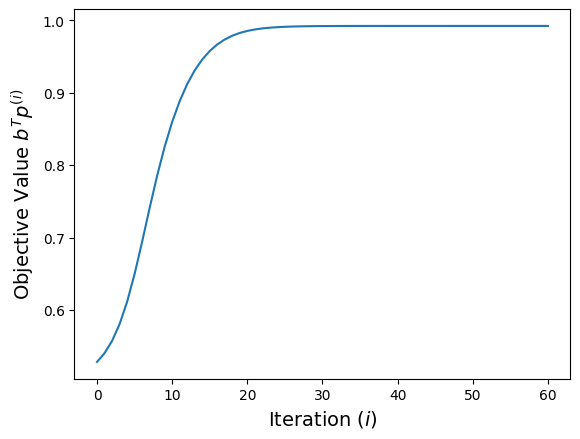

In [10]:
fig11, ax11 = plt.subplots(1, 1)
ax11.plot(objvals_b)
# ax11.set_title('Convergence Plot', fontsize=16)
ax11.set_xlabel('Iteration $(i)$', fontsize=14)
ax11.set_ylabel('Objective Value $b^Tp^{(i)}$', fontsize=14)
fig11.savefig('b_convergence.png')

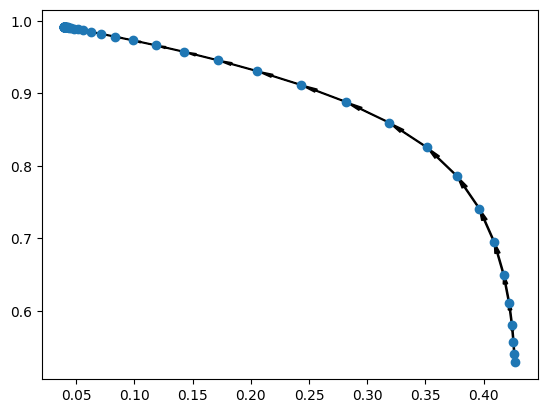

In [11]:
pvecs_b_arr = np.array(pvecs_b)
fig12, ax12 = plt.subplots(1, 1)
for v0, v1 in zip(pvecs_b_arr[:-1], pvecs_b_arr[1:]):
    x, y = v0[1], v0[2]
    dx, dy = v1[1]-v0[1], v1[2]-v0[2]
    norm = np.sqrt(dx*dx + dy*dy)
    ax12.arrow(x, y, dx, dy, length_includes_head=True, head_width=norm/10, head_length=norm/3, fc='k', ec='k')
ax12.scatter(pvecs_b_arr[:, 1], pvecs_b_arr[:, 2])

In [12]:
# ax12.set_title('Scatter Plot', fontsize=16)
ax12.set_xlabel('$p_2^{(i)}$', fontsize=14)
ax12.set_ylabel('$p_3^{(i)}$', fontsize=14)
fig12.savefig('b_scatter.png')

###What if K = 1, which is the number of Newton steps per path parameter.

In [13]:
# with different K=1
p0 = np.array([0.5, 0.5, 0.5])
tol = 1e-8
K = 1
mu0 = 3
alpha = 0.7

In [14]:
pstar_c, objvals_c, pvecs_c = dual_barrier(A, b, c, p0, mu0, alpha, tol, K)
print("(c): {}".format(pstar_c))

(c): [0.20000003 0.04000001 0.992     ]


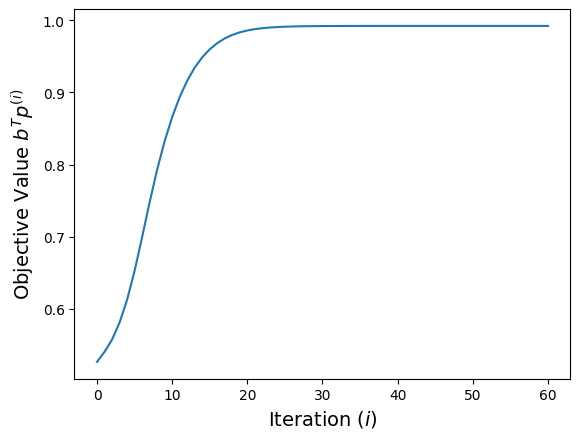

In [15]:
fig21, ax21 = plt.subplots(1, 1)
ax21.plot(objvals_c)
# ax21.set_title('Convergence Plot', fontsize=16)
ax21.set_xlabel('Iteration $(i)$', fontsize=14)
ax21.set_ylabel('Objective Value $b^Tp^{(i)}$', fontsize=14)
fig21.savefig('c_convergence.png')

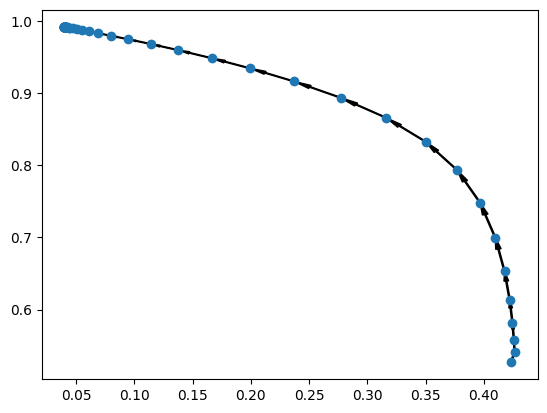

In [16]:
pvecs_c_arr = np.array(pvecs_c)
fig22, ax22 = plt.subplots(1, 1)
for v0, v1 in zip(pvecs_c_arr[:-1], pvecs_c_arr[1:]):
    x, y = v0[1], v0[2]
    dx, dy = v1[1]-v0[1], v1[2]-v0[2]
    norm = np.sqrt(dx*dx + dy*dy)
    ax22.arrow(x, y, dx, dy, length_includes_head=True, head_width=norm/10, head_length=norm/3, fc='k', ec='k')
ax22.scatter(pvecs_c_arr[:, 1], pvecs_c_arr[:, 2])

In [17]:
# ax22.set_title('Scatter Plot', fontsize=16)
ax22.set_xlabel('$p_2^{(i)}$', fontsize=14)
ax22.set_ylabel('$p_3^{(i)}$', fontsize=14)
fig22.savefig('c_scatter.png')

###What if the initial point $p_0$ is different from the initial try.

In [18]:
# with different p0
p0 = np.array([0.3, 0.2, 0.1])
tol = 1e-8
K = 3
mu0 = 3
alpha = 0.7

In [19]:
pstar_d, objvals_d, pvecs_d = dual_barrier(A, b, c, p0, mu0, alpha, tol, K)
print("(d): {}".format(pstar_d))

(d): [0.20000004 0.04000002 0.992     ]


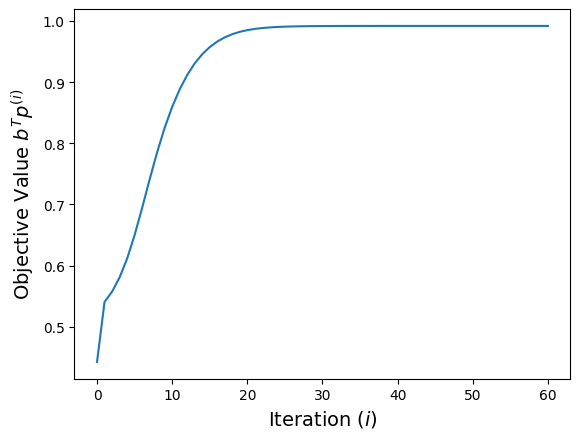

In [20]:
fig31, ax31 = plt.subplots(1, 1)
ax31.plot(objvals_d)
# ax31.set_title('Convergence Plot', fontsize=16)
ax31.set_xlabel('Iteration $(i)$', fontsize=14)
ax31.set_ylabel('Objective Value $b^Tp^{(i)}$', fontsize=14)
fig31.savefig('d_convergence.png')

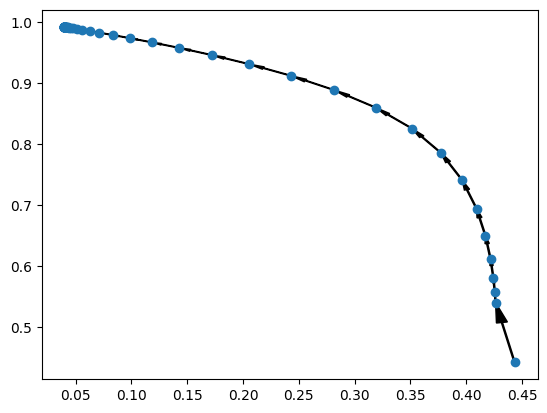

In [21]:
pvecs_d_arr = np.array(pvecs_d)
fig32, ax32 = plt.subplots(1, 1)
for v0, v1 in zip(pvecs_d_arr[:-1], pvecs_d_arr[1:]):
    x, y = v0[1], v0[2]
    dx, dy = v1[1]-v0[1], v1[2]-v0[2]
    norm = np.sqrt(dx*dx + dy*dy)
    ax32.arrow(x, y, dx, dy, length_includes_head=True, head_width=norm/10, head_length=norm/3, fc='k', ec='k')
ax32.scatter(pvecs_d_arr[:, 1], pvecs_d_arr[:, 2])

In [22]:
# ax22.set_title('Scatter Plot', fontsize=16)
ax32.set_xlabel('$p_2^{(i)}$', fontsize=14)
ax32.set_ylabel('$p_3^{(i)}$', fontsize=14)
fig32.savefig('d_scatter.png')